In [1]:
import argparse

class CmdArguments:
	def __init__(self):
		pass

	def _create_parser(self, description):
		parser = argparse.ArgumentParser(description = description)
		return parser

	def __add_common_arguments(self, parser):
		parser.add_argument("dataset_file", help = "Dataset file", default = "")
		return None

	def _create_arguments(self, parser):
		self.__add_common_arguments(parser)
		self.arguments = parser.parse_args()
		return None

	def getArguments(self):
		return (self.arguments)

class CmdArguments_describe(CmdArguments):
	def __init__(self):
		CmdArguments.__init__(self)
		parser = self._create_parser("describe prints basic informtion about a content of a dataset file.")
		parser.add_argument("-T", "--Transpose", help = "Transposed printout",
			action=argparse.BooleanOptionalAction, required = False, default = False)
		parser.add_argument("-V", "--Validate", help = "Validate calculations printout",
			action=argparse.BooleanOptionalAction, required = False, default = False)
		parser.add_argument("-v", "--verbose", help = "Print details",
			type=int, required = False, default = 3)
		self._create_arguments(parser)
		return None

class CmdArguments_histogram(CmdArguments):
	def __init__(self):
		CmdArguments.__init__(self)
		parser = self._create_parser("histogram visualize basic informtion about a content of a dataset file.")
		self._create_arguments(parser)
		return None

class CmdArguments_pair(CmdArguments):
	def __init__(self):
		CmdArguments.__init__(self)
		parser = self._create_parser("pair visualize basic informtion about a content of a dataset file.")
		self._create_arguments(parser)
		return None

class CmdArguments_box(CmdArguments):
	def __init__(self):
		CmdArguments.__init__(self)
		parser = self._create_parser("box visualize basic informtion about a content of a dataset file.")
		self._create_arguments(parser)
		return None

class CmdArguments_correlation(CmdArguments):
	def __init__(self):
		CmdArguments.__init__(self)
		parser = self._create_parser("correlation visualize basic informtion about a content of a dataset file.")
		self._create_arguments(parser)
		return None

class CmdArguments_scatter(CmdArguments):
	def __init__(self):
		CmdArguments.__init__(self)
		parser = self._create_parser("scatter visualize basic informtion about a content of a dataset file.")
		self._create_arguments(parser)
		return None


In [2]:
import pandas as pd
import numpy as np

class HogwartsSubjects():
	def __init__(self, dataset_file):
		dataset = pd.read_csv(dataset_file)
#		dataset = dataset.dropna()
		self.subjectList = ["Arithmancy", "Astronomy", "Herbology", \
			"Defense Against the Dark Arts", "Divination", 'Muggle Studies', \
	       'Ancient Runes', 'History of Magic', 'Transfiguration', 'Potions', \
    	   'Care of Magical Creatures', 'Charms', 'Flying']
		self.hogwartsSubjects = dataset[self.subjectList]
		self.color_set = self.__create_color_list(dataset)
		self.subjectListLen = len(self.subjectList)

	def __create_color_list(self, dataset):
		color_dict = {}
		color_dict['Ravenclaw'] = 'blue'
		color_dict['Slytherin'] = 'red'
		color_dict['Gryffindor'] = 'green'
		color_dict['Hufflepuff'] = 'black'
		color_list = []
		for name in dataset['Hogwarts House']:
			color_list.append(color_dict[name])
		color_set = np.array(color_list)
		return (color_set)

	def getColorSet(self):
		return (self.color_set)

	def getDataFrame(self):
		return (self.hogwartsSubjects)

	def getSubjectList(self):
		return (self.subjectList)

	def getNumOfSubjects(self):
		return (self.subjectListLen)



In [3]:
import os
import sys
import pandas as pd
import matplotlib.pyplot as plt
import math


In [10]:
dataset_file = "../data/dataset_train.csv"
hogwartsSubjects = HogwartsSubjects(dataset_file)
hogwartsSubjects_df = hogwartsSubjects.getDataFrame()
color_set = hogwartsSubjects.getColorSet()
getSubjectList = hogwartsSubjects.getSubjectList()
i = 0
print(str(hogwartsSubjects_df[getSubjectList[i]][[0,33,55]]))


0     58384.0
33    54477.0
55    68337.0
Name: Arithmancy, dtype: float64


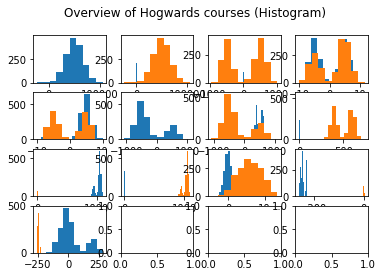

In [5]:
fig, axes = plt.subplots(4,4)
axes = axes.flatten()
for i in range(0, hogwartsSubjects.getNumOfSubjects()):
	axes[i].hist(hogwartsSubjects_df[getSubjectList[i]])
	if i > 0:
		axes[i].hist(hogwartsSubjects_df[getSubjectList[i - 1]])
title = "Overview of Hogwards courses (Histogram)"
columns = math.ceil(np.sqrt(hogwartsSubjects_df.shape[1]))
rows = math.ceil(hogwartsSubjects_df.shape[1] / columns)
#hogwartsSubjects_df.plot(kind='hist', subplots=False,
#	layout=(rows, columns), sharex=False, sharey=False, title=title)
#hogwartsSubjects_df.plot(kind='hist', subplots=True,
#	layout=(rows, columns), sharex=False, sharey=False, title=title, color="read")
plt.suptitle(title)
plt.show()
